<a href="https://colab.research.google.com/github/Bokyoung-00/python_education/blob/master/Kaggle_Walmart_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preparing the Packages 

In [6]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading Data Set

- Look at the data set roughly

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
from os.path import join

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
drive.mount(ROOT)  

/content/drive
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
MY_GOOGLE_DRIVE_PATH = 'My Drive/Colab Notebooks/m5-forecasting-accuracy/' # 프로젝트 경로
PROJECT_PATH = join(ROOT, MY_GOOGLE_DRIVE_PATH) # 프로젝트 경로
print(PROJECT_PATH)

/content/drive/My Drive/Colab Notebooks/m5-forecasting-accuracy/


In [3]:
%cd "{PROJECT_PATH}"

/content/drive/My Drive/Colab Notebooks/m5-forecasting-accuracy


In [4]:
%ls

calendar.csv                sales_train_validation.csv  sell_prices.csv
sales_train_evaluation.csv  sample_submission.csv


In [14]:
# import sample_submission file
train = pd.read_csv('sales_train_validation.csv')
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4


In [8]:
# import sample_submission file
prices = pd.read_csv('sell_prices.csv')
prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [10]:
# import sample_submission file
calendar = pd.read_csv('calendar.csv')
calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [12]:
# import sample_submission file
train_evaluation = pd.read_csv('sales_train_evaluation.csv')
train_evaluation.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,d_1922,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,3,0,1,1,1,3,0,1,1,0,0,0,2,0,3,5,0,0,1,1,0,2,1,2,2,1,0,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,2,2,1,2,1,1,1,0,1,1,1,0,0,1,1,0,2,1,0,0,0,0,2,1,3,0,0,1,0,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,0,1,0,5,4,1,0,1,3,7,2,0,0,1,2,4,1,6,4,0,0,0,2,2,4,2,1,1,1,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,2,1,1,0,1,1,2,2,2,4,1,0,2,3,1,0,3,2,3,1,1,3,2,3,2,2,2,2,0,0,0,2,1,0,0,2,1,0


In [13]:
# import sample_submission file
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
train.shape

(30490, 1919)

In [18]:
train.info

<bound method DataFrame.info of                                   id        item_id  ... d_1912 d_1913
0      HOBBIES_1_001_CA_1_validation  HOBBIES_1_001  ...      1      1
1      HOBBIES_1_002_CA_1_validation  HOBBIES_1_002  ...      0      0
2      HOBBIES_1_003_CA_1_validation  HOBBIES_1_003  ...      1      1
3      HOBBIES_1_004_CA_1_validation  HOBBIES_1_004  ...      7      2
4      HOBBIES_1_005_CA_1_validation  HOBBIES_1_005  ...      2      4
...                              ...            ...  ...    ...    ...
30485    FOODS_3_823_WI_3_validation    FOODS_3_823  ...      0      1
30486    FOODS_3_824_WI_3_validation    FOODS_3_824  ...      1      0
30487    FOODS_3_825_WI_3_validation    FOODS_3_825  ...      1      0
30488    FOODS_3_826_WI_3_validation    FOODS_3_826  ...      1      3
30489    FOODS_3_827_WI_3_validation    FOODS_3_827  ...      0      0

[30490 rows x 1919 columns]>

In [19]:
train.isnull().sum()

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1909      0
d_1910      0
d_1911      0
d_1912      0
d_1913      0
Length: 1919, dtype: int64

In [26]:
category=train.groupby(["cat_id"])
category.get_group("HOBBIES")

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,d_11,d_12,d_13,d_14,d_15,d_16,d_17,d_18,d_19,d_20,d_21,d_22,d_23,d_24,d_25,d_26,d_27,d_28,d_29,d_30,d_31,d_32,d_33,d_34,...,d_1874,d_1875,d_1876,d_1877,d_1878,d_1879,d_1880,d_1881,d_1882,d_1883,d_1884,d_1885,d_1886,d_1887,d_1888,d_1889,d_1890,d_1891,d_1892,d_1893,d_1894,d_1895,d_1896,d_1897,d_1898,d_1899,d_1900,d_1901,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,3,1,3,1,2,2,0,1,1,1,1,0,0,0,0,0,1,0,4,2,3,0,1,2,0,0,0,1,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,2,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,3,4,2,1,4,1,3,5,0,6,6,0,0,0,0,3,1,2,1,3,1,0,2,5,4,2,0,3,0,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,3,2,2,2,3,1,0,0,0,0,1,0,4,4,0,1,4,0,1,0,1,0,1,1,2,0,1,1,2,1,1,0,1,1,2,2,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28001,HOBBIES_2_145_WI_3_validation,HOBBIES_2_145,HOBBIES_2,HOBBIES,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2,0,1,0,1,0,1,0,1,2,0,1,0,0,0,0,2,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0
28002,HOBBIES_2_146_WI_3_validation,HOBBIES_2_146,HOBBIES_2,HOBBIES,WI_3,WI,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,...,0,0,1,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28003,HOBBIES_2_147_WI_3_validation,HOBBIES_2_147,HOBBIES_2,HOBBIES,WI_3,WI,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,1,0,1,0,0,0,1,1,0,0,1,0,3,0,0,0,1,1,0,0,0,4,3,0,0,0,1,3,1,0,0,0,0,2,0,1,2,0
28004,HOBBIES_2_148_WI_3_validation,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI_3,WI,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Processing and Visualization 데이터 전처리 및 시각화

- product departments, product categories, stores, and three geographical areas: the States of California (CA), Texas (TX), and Wisconsin (WI)

- 


### (1) Merging the data with real dates

In [28]:
calendar[['d','date','event_name_1','event_name_2',
     'event_type_1','event_type_2', 'snap_CA']].head()

,d,date,event_name_1,event_name_2,event_type_1,event_type_2,snap_CA
0,d_1,2011-01-29,NaN,NaN,NaN,NaN,0
1,d_2,2011-01-30,NaN,NaN,NaN,NaN,0
2,d_3,2011-01-31,NaN,NaN,NaN,NaN,0
3,d_4,2011-02-01,NaN,NaN,NaN,NaN,1
4,d_5,2011-02-02,NaN,NaN,NaN,NaN,1


In [50]:
# If there is 'd_' in the column name, we call it d_cols
d_cols = [c for c in train_validation.columns if 'd_' in c]

past_sales = train_validation.set_index('id')[d_cols].T.merge(calendar.set_index('d')['date'],
                                                              left_index = True,
                                                              right_index=True,
                                                            validate= '1:1').set_index('date')
past_sales.head()

,HOBBIES_1_001_CA_1_validation,HOBBIES_1_002_CA_1_validation,HOBBIES_1_003_CA_1_validation,HOBBIES_1_004_CA_1_validation,HOBBIES_1_005_CA_1_validation,HOBBIES_1_006_CA_1_validation,HOBBIES_1_007_CA_1_validation,HOBBIES_1_008_CA_1_validation,HOBBIES_1_009_CA_1_validation,HOBBIES_1_010_CA_1_validation,HOBBIES_1_011_CA_1_validation,HOBBIES_1_012_CA_1_validation,HOBBIES_1_013_CA_1_validation,HOBBIES_1_014_CA_1_validation,HOBBIES_1_015_CA_1_validation,HOBBIES_1_016_CA_1_validation,HOBBIES_1_017_CA_1_validation,HOBBIES_1_018_CA_1_validation,HOBBIES_1_019_CA_1_validation,HOBBIES_1_020_CA_1_validation,HOBBIES_1_021_CA_1_validation,HOBBIES_1_022_CA_1_validation,HOBBIES_1_023_CA_1_validation,HOBBIES_1_024_CA_1_validation,HOBBIES_1_025_CA_1_validation,HOBBIES_1_026_CA_1_validation,HOBBIES_1_027_CA_1_validation,HOBBIES_1_028_CA_1_validation,HOBBIES_1_029_CA_1_validation,HOBBIES_1_030_CA_1_validation,HOBBIES_1_031_CA_1_validation,HOBBIES_1_032_CA_1_validation,HOBBIES_1_033_CA_1_validation,HOBBIES_1_034_CA_1_validation,HOBBIES_1_035_CA_1_validation,HOBBIES_1_036_CA_1_validation,HOBBIES_1_037_CA_1_validation,HOBBIES_1_038_CA_1_validation,HOBBIES_1_039_CA_1_validation,HOBBIES_1_040_CA_1_validation,...,FOODS_3_788_WI_3_validation,FOODS_3_789_WI_3_validation,FOODS_3_790_WI_3_validation,FOODS_3_791_WI_3_validation,FOODS_3_792_WI_3_validation,FOODS_3_793_WI_3_validation,FOODS_3_794_WI_3_validation,FOODS_3_795_WI_3_validation,FOODS_3_796_WI_3_validation,FOODS_3_797_WI_3_validation,FOODS_3_798_WI_3_validation,FOODS_3_799_WI_3_validation,FOODS_3_800_WI_3_validation,FOODS_3_801_WI_3_validation,FOODS_3_802_WI_3_validation,FOODS_3_803_WI_3_validation,FOODS_3_804_WI_3_validation,FOODS_3_805_WI_3_validation,FOODS_3_806_WI_3_validation,FOODS_3_807_WI_3_validation,FOODS_3_808_WI_3_validation,FOODS_3_809_WI_3_validation,FOODS_3_810_WI_3_validation,FOODS_3_811_WI_3_validation,FOODS_3_812_WI_3_validation,FOODS_3_813_WI_3_validation,FOODS_3_814_WI_3_validation,FOODS_3_815_WI_3_validation,FOODS_3_816_WI_3_validation,FOODS_3_817_WI_3_validation,FOODS_3_818_WI_3_validation,FOODS_3_819_WI_3_validation,FOODS_3_820_WI_3_validation,FOODS_3_821_WI_3_validation,FOODS_3_822_WI_3_validation,FOODS_3_823_WI_3_validation,FOODS_3_824_WI_3_validation,FOODS_3_825_WI_3_validation,FOODS_3_826_WI_3_validation,FOODS_3_827_WI_3_validation
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-01-29,0,0,0,0,0,0,0,12,2,0,0,0,0,0,4,5,0,0,0,0,0,2,2,0,0,0,0,0,2,0,0,9,0,0,0,2,0,0,0,0,...,0,0,0,0,16,2,1,0,0,0,0,0,36,0,0,0,14,0,0,7,4,0,0,0,0,0,0,0,0,0,0,14,1,0,4,0,0,0,0,0
2011-01-30,0,0,0,0,0,0,0,15,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,12,6,0,0,0,0,0,0,39,0,0,0,7,0,0,6,13,0,0,0,4,0,0,0,0,1,0,11,1,0,4,0,0,6,0,0
2011-01-31,0,0,0,0,0,0,0,0,7,1,0,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,1,0,0,...,0,0,0,0,11,1,1,0,0,0,0,0,34,0,0,0,6,0,0,9,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,2,0,0,0,0
2011-02-01,0,0,0,0,0,0,0,0,3,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,1,0,0,...,0,0,0,0,11,3,1,0,0,0,0,0,42,0,0,0,9,0,0,1,1,0,0,0,1,0,0,0,0,1,0,6,1,0,5,2,0,2,0,0
2011-02-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,2,0,0,0,0,1,0,0,0,8,0,0,0,0,0,0,0,0,...,0,0,0,0,6,5,0,0,0,0,0,0,29,0,0,0,0,0,0,6,5,0,0,0,0,0,0,0,0,0,0,5,1,0,2,0,0,2,0,0


### (2) Combined Sales over Time by Type

In [29]:
train_validation['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [37]:
summary= train_validation.groupby('cat_id').count()['id'].sort_values()

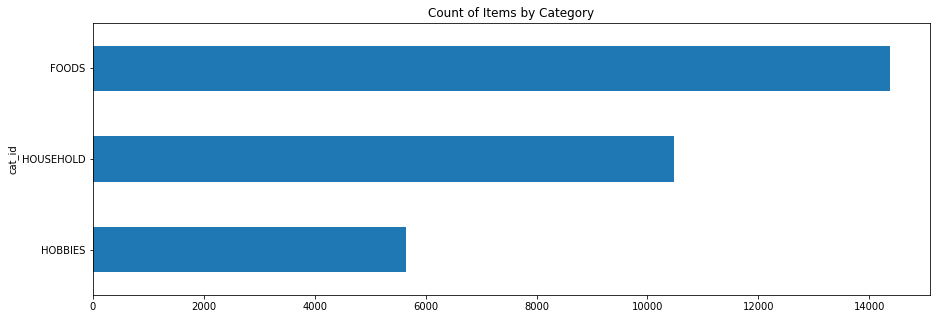

In [39]:
summary.plot(kind='barh', figsize=(15, 5), title='Count of Items by Category')
plt.show()

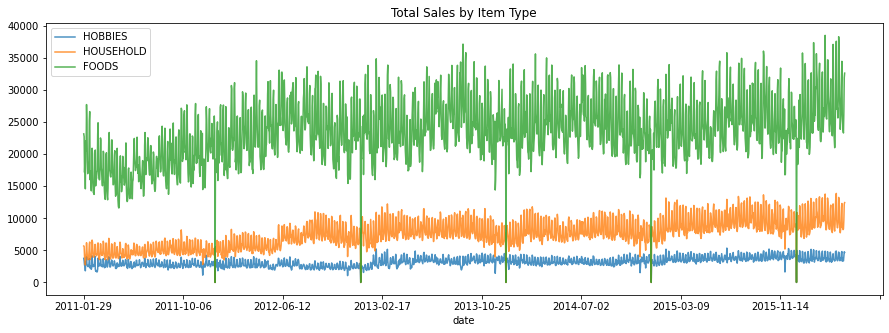

In [49]:
for i in train_validation['cat_id'].unique():
  items_col = [c for c in past_sales.columns if i in c]
  past_sales[items_col].sum(axis=1).plot(figsize=(15,5),
                                         alpha=0.8,
                                         title="Total Sales by Item Type")
plt.legend(train_validation['cat_id'].unique())
plt.show()

### (3) Rollout of items being sold
- some of the items does not appear in sale at the beginning of the provided data becauses they are released slowly into inventory

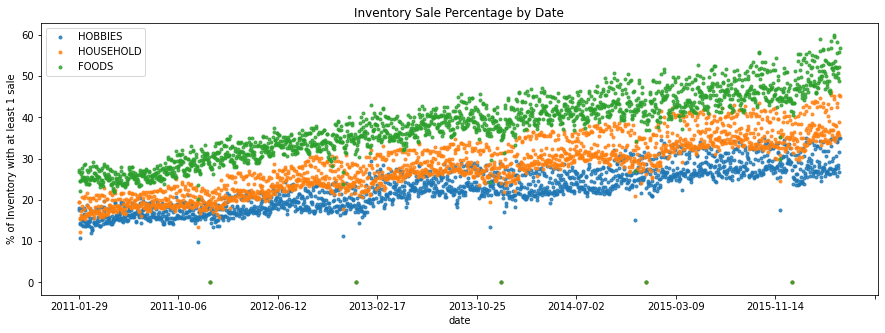

In [52]:
# clip attribute makes values between 0 and 1

past_sales_clipped= past_sales.clip(0,1)
for i in train_validation['cat_id'].unique():
  items_col= [c for c in past_sales.columns if i in c]
  (past_sales_clipped[items_col].mean(axis=1)*100).plot(figsize=(15,5), alpha=0.8, title="Inventory Sale Percentage by Date", style='.')
plt.ylabel("% of Inventory with at least 1 sale")
plt.legend(train_validation["cat_id"].unique())

plt.show()


### (4) Sales by Store

In [55]:
store_list= prices['store_id'].unique()
store_list

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

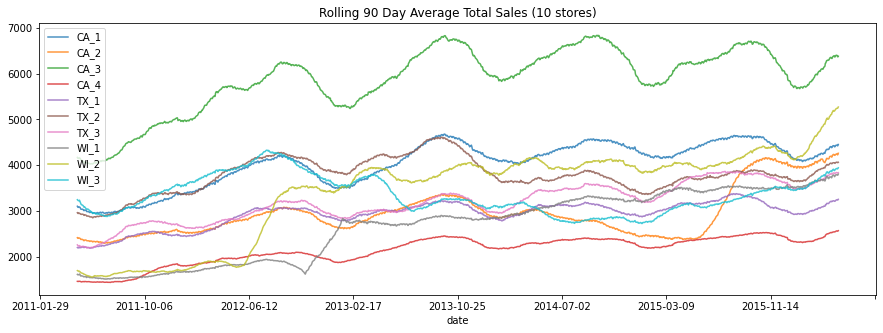

In [58]:
# Simple Moving Average 단순 이동 평균 구하는 Rolling().mean()
# 매일 가격 변동에서 나오는 노이즈를 제거하는데 도움을 주고 추세를 볼 수 있도록 도움을 줍니다.

for s in store_list:
  store_items=[c for c in past_sales.columns if s in c]
  past_sales[store_items].sum(axis=1).rolling(90).mean().plot(figsize=(15,5),alpha=0.8,
                                                              title="Rolling 90 Day Average Total Sales (10 stores)")

plt.legend(store_list)
plt.show()

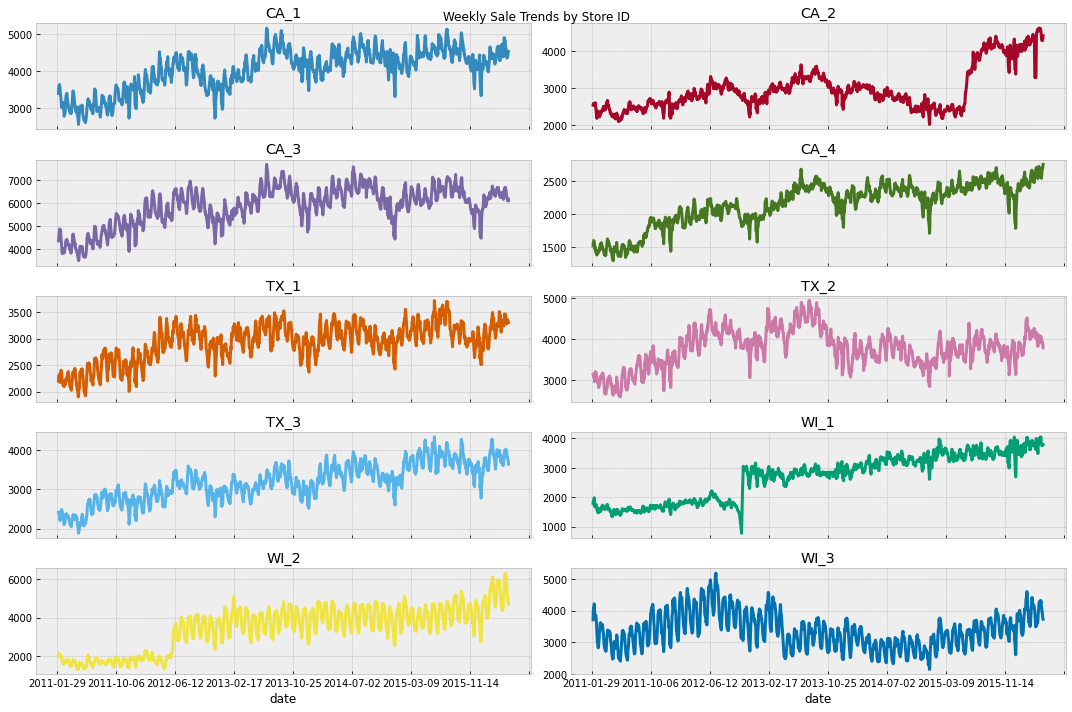

In [62]:
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

fig, axes = plt.subplots(5,2, figsize=(15,10), sharex=True)
axes = axes.flatten()
ax_idx = 0
for s in store_list:
  store_items = [c for c in past_sales.columns if s in c]
  past_sales[store_items].sum(axis=1).rolling(7).mean().plot(alpha=1, ax=axes[ax_idx], title=s, lw=3, color=next(color_cycle))
  ax_idx += 1
plt.suptitle("Weekly Sale Trends by Store ID")
plt.tight_layout()
plt.show()

### (5) Sales Heatmap Calender

In [68]:
past_sales.sum(axis=1).sort_values()

date
2012-12-25       11
2011-12-25       13
2015-12-25       14
2013-12-25       20
2014-12-25       20
              ...  
2015-10-03    54687
2016-02-06    55040
2016-04-09    56340
2016-04-03    56425
2016-03-06    57218
Length: 1913, dtype: int64

In [65]:
# Lowest sale date - Christmas

print("on",past_sales.sum(axis=1).sort_values().index[0])
print(past_sales.sum(axis=1).sort_values().values[0],"sales")

on 2012-12-25
11 sales


In [69]:
# Hightes sale date - Easter 

print("on",past_sales.sum(axis=1).sort_values(ascending=False).index[0])
print(past_sales.sum(axis=1).sort_values(ascending=False).values[0],"sales")

on 2016-03-06
57218 sales


NameError: ignored

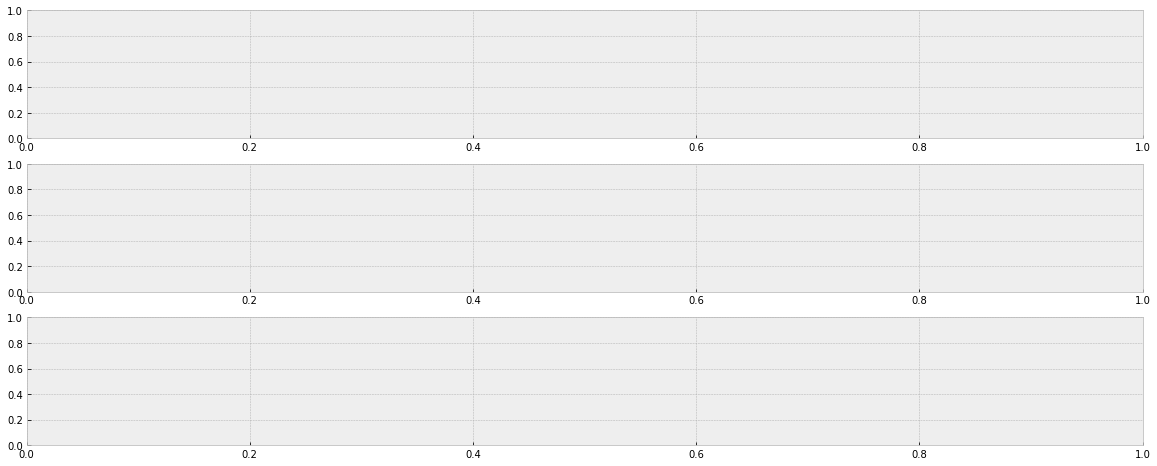

In [82]:
# 판다스 최신 버전과 calmap이 호환되지 않아 오류
# 해결하려면 판다스 __version__== 0.25.3 사용해야함 

from sklearn.preprocessing import StandardScaler
import numpy as np; np.random.seed(sum(map(ord, 'calmap')))
import pandas as pd
import calmap
sscale = StandardScaler()
past_sales.index = pd.to_datetime(past_sales.index)
for i in train_validation['cat_id'].unique():
    fig, axes = plt.subplots(3, 1, figsize=(20, 8))
    items_col = [c for c in past_sales.columns if i in c]
    sales2013 = past_sales.loc[past_sales.index.isin(pd.date_range('31-Dec-2012',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2013.values.reshape(-1, 1)))
    calmap(axes[0], 2013, vals.reshape(53,7).T)
    sales2014 = past_sales.loc[past_sales.index.isin(pd.date_range('30-Dec-2013',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2014.values.reshape(-1, 1)))
    calmap(axes[1], 2014, vals.reshape(53,7).T)
    sales2015 = past_sales.loc[past_sales.index.isin(pd.date_range('29-Dec-2014',
                                                                   periods=371))][items_col].mean(axis=1)
    vals = np.hstack(sscale.fit_transform(sales2015.values.reshape(-1, 1)))
    calmap(axes[2], 2015, vals.reshape(53,7).T)
    plt.suptitle(i, fontsize=30, x=0.4, y=1.01)
    plt.tight_layout()
    plt.show()

### (6) Sale Prices

- Different stores have different selling prices





In [86]:

for store, d in prices.query('item_id =="FOODS_3_090"').groupby('store_id'):
  print(store, d)

CA_1        store_id      item_id  wm_yr_wk  sell_price
530695     CA_1  FOODS_3_090     11101        1.25
530696     CA_1  FOODS_3_090     11102        1.25
530697     CA_1  FOODS_3_090     11103        1.25
530698     CA_1  FOODS_3_090     11104        1.25
530699     CA_1  FOODS_3_090     11105        1.25
...         ...          ...       ...         ...
530972     CA_1  FOODS_3_090     11617        1.60
530973     CA_1  FOODS_3_090     11618        1.60
530974     CA_1  FOODS_3_090     11619        1.60
530975     CA_1  FOODS_3_090     11620        1.60
530976     CA_1  FOODS_3_090     11621        1.60

[282 rows x 4 columns]
CA_2         store_id      item_id  wm_yr_wk  sell_price
1177293     CA_2  FOODS_3_090     11101        1.25
1177294     CA_2  FOODS_3_090     11102        1.25
1177295     CA_2  FOODS_3_090     11103        1.25
1177296     CA_2  FOODS_3_090     11104        1.25
1177297     CA_2  FOODS_3_090     11105        1.25
...          ...          ...       ...   

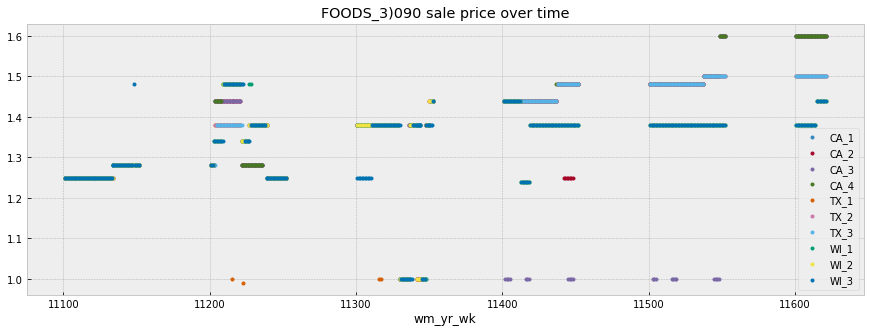

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
stores = []
for store, d in prices.query('item_id =="FOODS_3_090"').groupby('store_id'):
  d.plot(x="wm_yr_wk",
         y="sell_price",
         style='.',
         color=next(color_cycle),
         figsize=(15,5),
         title="FOODS_3)090 sale price over time",
         ax=ax,
         legend=store)
  stores.append(store)
  plt.legend()
plt.legend(stores)
plt.show()

In [90]:
prices['Category']= prices['item_id'].str.split('_', expand=True)[0]
prices['Category']

0          HOBBIES
1          HOBBIES
2          HOBBIES
3          HOBBIES
4          HOBBIES
            ...   
6841116      FOODS
6841117      FOODS
6841118      FOODS
6841119      FOODS
6841120      FOODS
Name: Category, Length: 6841121, dtype: object

In [94]:
prices.head()

,store_id,item_id,wm_yr_wk,sell_price,Category
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES


In [96]:
prices.groupby('Category').head()

,store_id,item_id,wm_yr_wk,sell_price,Category
0,CA_1,HOBBIES_1_001,11325,9.58,HOBBIES
1,CA_1,HOBBIES_1_001,11326,9.58,HOBBIES
2,CA_1,HOBBIES_1_001,11327,8.26,HOBBIES
3,CA_1,HOBBIES_1_001,11328,8.26,HOBBIES
4,CA_1,HOBBIES_1_001,11329,8.26,HOBBIES
129629,CA_1,HOUSEHOLD_1_001,11101,6.32,HOUSEHOLD
129630,CA_1,HOUSEHOLD_1_001,11102,6.32,HOUSEHOLD
129631,CA_1,HOUSEHOLD_1_001,11103,6.32,HOUSEHOLD
129632,CA_1,HOUSEHOLD_1_001,11104,6.32,HOUSEHOLD
129633,CA_1,HOUSEHOLD_1_001,11105,6.32,HOUSEHOLD


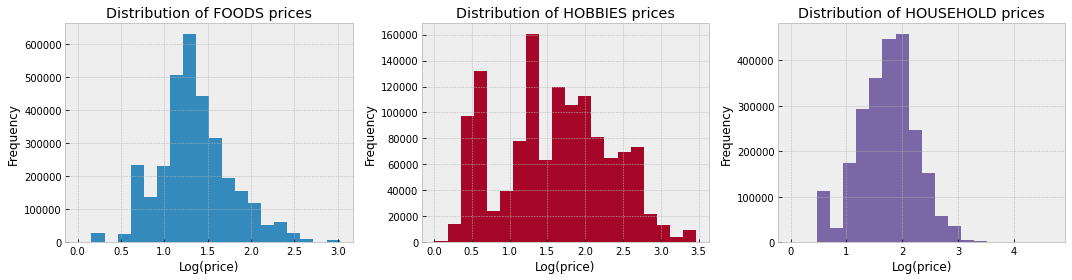

In [93]:
fig, axs = plt.subplots(1,3, figsize=(15,4))
i=0
for cat, d in prices.groupby('Category'):
  ax= d["sell_price"].apply(np.log1p).plot(kind='hist', bins=20, title=f'Distribution of {cat} prices', ax=axs[i],
                                           color=next(color_cycle))
  ax.set_xlabel('Log(price)')
  i+=1
plt.tight_layout()

## Submission

In [100]:
thirty_day_avg_map = train_validation.set_index('id')[d_cols[-30:]].mean(axis=1).to_dict()
fcols = [f for f in sample_submission.columns if 'F' in f]
for f in fcols:
    sample_submission[f] = sample_submission['id'].map(thirty_day_avg_map).fillna(0)
    
sample_submission.to_csv('submission.csv', index=False)